In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv('mxmh_survey_results.csv')

In [251]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [252]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

## Первичная обработка данных

### Заполняем пропуски

In [253]:
# возраст (1 пропуск)
df[df['Age'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
12,8/27/2022 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,...,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.


In [254]:
# Делаем гипотезу, что возраст зависит от стримингового сервиса и любимого типа музыки.
print(df[df['Primary streaming service'] == 'Spotify'].groupby('Age').size())
print(df[df['Fav genre'] == 'Hip hop'].groupby('Age').size())

Age
12.0     2
13.0     5
14.0    12
15.0    15
16.0    33
17.0    43
18.0    58
19.0    44
20.0    22
21.0    32
22.0    25
23.0    24
24.0    13
25.0    15
26.0    17
27.0    15
28.0     7
29.0     6
30.0     7
31.0     9
32.0    10
33.0     3
34.0     4
35.0     6
36.0     2
37.0     4
38.0     5
39.0     1
40.0     2
41.0     2
42.0     2
43.0     1
44.0     1
48.0     1
49.0     2
53.0     1
57.0     1
60.0     2
63.0     1
72.0     1
89.0     1
dtype: int64
Age
15.0    2
16.0    2
17.0    4
18.0    5
19.0    2
20.0    2
21.0    1
22.0    2
23.0    3
26.0    2
27.0    1
28.0    1
29.0    2
32.0    1
35.0    1
36.0    1
39.0    1
58.0    1
dtype: int64


In [255]:
# в обоих случаях максимальное количество совпадений - 18 лет, заполняем пропуск возрастом 18
df['Age'] = df['Age'].fillna(18)

In [256]:
# стриминговый сервис (1 пропуск)
df[df['Primary streaming service'].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
197,8/28/2022 20:50:37,21.0,NaN,5.0,Yes,No,No,Country,Yes,No,...,Never,Rarely,Very frequently,Never,9.0,8.0,9.0,7.0,Improve,I understand.


In [95]:
# смотрим, какой сервис использует большинство пользователей возраста 21 
df[df['Age'] == 21].groupby('Primary streaming service').size()

Primary streaming service
Apple Music                           4
I do not use a streaming service.     6
Other streaming service               1
Spotify                              32
YouTube Music                         8
dtype: int64

In [257]:
# заполняем пропуск сервисом Spotify
df['Primary streaming service'] = df['Primary streaming service'].fillna('Spotify')

In [ ]:
# дальше не стал пропуски заполнять, т.к. учебный кейс

### Меняем данные object на цифровые для возможности анализа

In [258]:
'''
Меняем ответ obj на значение:
Never - 0
Rarely - 1
Sometimes - 2
Very frequently - 3
'''

'\nМеняем ответ obj на значение:\nNever - 0\nRarely - 1\nSometimes - 2\nVery frequently - 3\n'

In [259]:
def listener(x):
    mydict = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
    return mydict[x]

In [260]:
for i in df.columns[11:27]:
    df[i] = df[i].apply(listener)

In [102]:
def musician(x):
    mydict = {'Yes': 1, 'No': 0}
    try:
        return mydict[x]
    except:
        return 0

In [103]:
# заменим в колонках while working, instrumentalist, composer Yes на 1, No на 0. Если данных нет, ставим 0
for i in df.columns[4:7]:
    df[i] = df[i].apply(musician)

In [261]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,2,3,0,2,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,2,1,3,1,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,0,1,1,3,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,2,0,0,0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,3,3,0,1,7.0,2.0,5.0,9.0,Improve,I understand.


## Графики

### 1. Гистограмма

<AxesSubplot:ylabel='Frequency'>

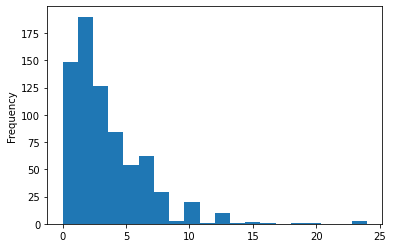

In [264]:
#Посмотрим, как часто вообще люди случают музыку (сколько часов в день)
df['Hours per day'].plot(kind='hist', bins=20)

In [265]:
df['Hours per day'].max()

24.0

In [266]:
# видим сразу выбросы и некорректные значения (не должно быть прослушивания музыки 24 часа в сутки). Уберем выбросы через расчеты размаха
def outliners(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  return lower_bound, upper_bound

In [267]:
outliners_hours = outliners(df['Hours per day'])
outliners_hours

(-2.5, 9.5)

In [271]:
# на графике все же значительное количество людей слушают музыку больше 10 часов, поэтому применим гипотезу, что есть люди, которые слушают музыку все время, кроме сна(8 часов)
# т.е. удалим строки, где музыку слушают больше 16 часов
df_hist = df[df['Hours per day'] <= 16]

Text(0.5, 1.0, 'Распределение, сколько часов люди слушают музыку в день')

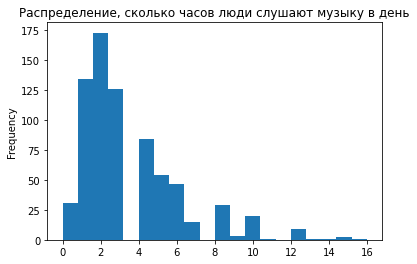

In [272]:
df_hist['Hours per day'].plot(kind='hist', bins=20)
plt.title('Распределение, сколько часов люди слушают музыку в день')

В среднем люди в исследовании слушают музыку 1-2 часа. Особо нам это ничего не дает, поэтому будем строить следующие графики

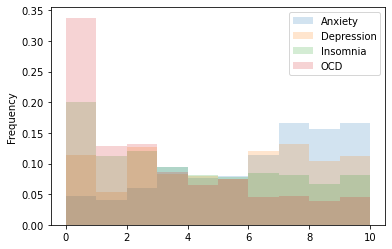

In [273]:
# чтоб потренироваться и несколько гистограмм сравнить, построим несколько гистограмм сразу по оценке болезней
df_hist['Anxiety'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

df_hist['Depression'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

df_hist['Insomnia'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

df_hist['OCD'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

plt.legend(loc='upper right')

Text(0.5, 1.0, 'Сравнение распределений нервных расстройств респондентов')

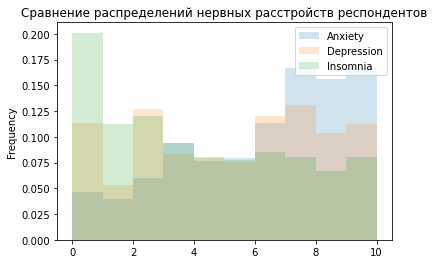

In [274]:
# уберем OCD, а то слишком сильное наложение, к тому же судя по всему люди меньше всего этому расстройству подвержены
df_hist['Anxiety'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

df_hist['Depression'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)

df_hist['Insomnia'].plot(kind='hist',
                   alpha = 0.2,
                   bins=10,
                   density = True)
plt.legend(loc='upper right')
plt.title('Сравнение распределений нервных расстройств респондентов')

Можно подумать о гипотезе, что люди, страюающие каким-то одним расстройством, скорее всего страдают и другими расстройствами в т.ч., в частности, при высокой тревожности Anxiety человек страдает также от депрессии и бессонницы. Поэтому можно ориентироваться в анализе, например, только на один показатель

### 2. Столбчатая диаграмма

In [275]:
# Посмотрим средний возраст пользователей стриминговых сервисов
df_column = df[['Age', 'Primary streaming service']].groupby('Primary streaming service').mean()
df_column

,Age
Primary streaming service,
Apple Music,24.215686
I do not use a streaming service.,31.605634
Other streaming service,30.220000
Pandora,50.181818
Spotify,22.688453
YouTube Music,27.542553


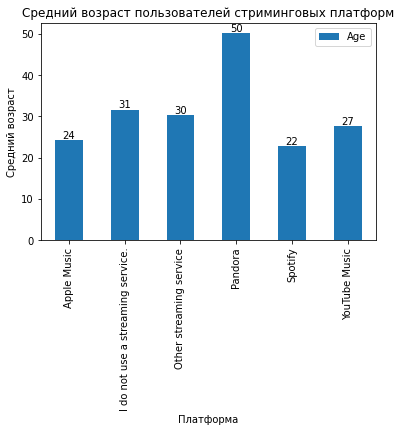

In [276]:
df_column.plot(kind = 'bar', 
         title = 'Средний возраст пользователей стриминговых платформ',
        xlabel = 'Платформа',
        ylabel = 'Средний возраст')
for i, val in enumerate(df_column.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

Гипотеза: молодые пользователи предпочитают использовать Spotify, при этом Pandora используется только людьми старшего возраста

### 3. Scatter plot

(0.0, 16.0)

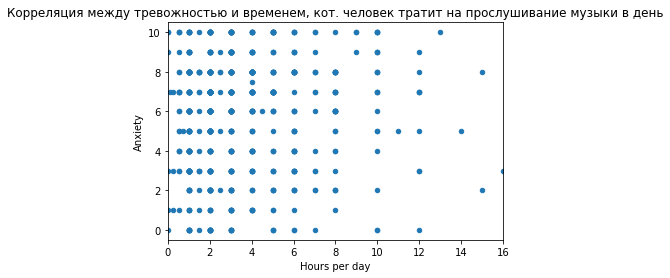

In [277]:
# посмотрим на взаимосвязь тревожности и времени прослушивания музыки пользователем
df.plot(kind='scatter',
       x='Hours per day',
       y='Anxiety',
       title='Корреляция между тревожностью и временем, кот. человек тратит на прослушивание музыки в день')
plt.xlim(0,16)

Никакой зависимости не наблюдается. Люди, страдающие тревожностью, могут слушать музыку как 0 часов в день, так и больше 10-ти. Соответственно, количество часов, которое челвоек тратит на прослушивание музыки в день, никак не влияет на его психическое состояние.

### 4. Pairplot

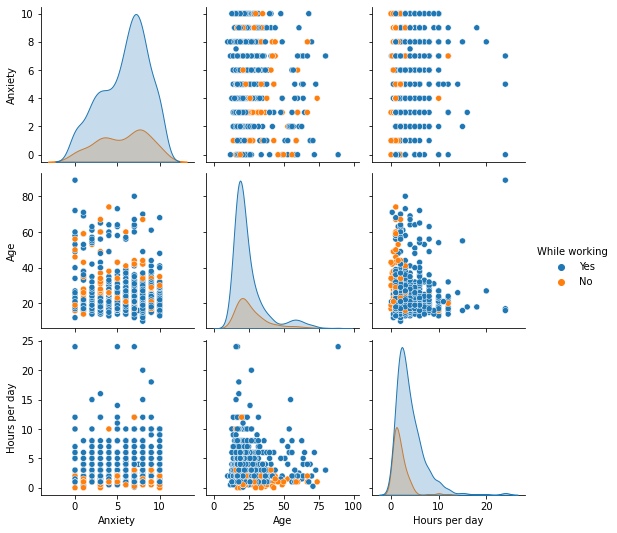

In [278]:
# попробуем сравнить между собой показатели тревожности, возраст и количество часов в день, отделяя, слушает ли пока работает
sns.pairplot(df[['Anxiety', 'Age', 'Hours per day', 'While working']], hue="While working")

Никакой, честно говоря, взаимосвязи тоже не прослеживается. Чем старше люди, тем реже они слушают музыку долго. Но молодые люди также слушают музыку в основном не очень много. С тревожностью вообще никакой зависимости

### 5. Тепловая карта

In [279]:
# посчитаем средние значения тревожностей и посмотрим их зависимость от любимого жанра
df_heatplot = df2[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].groupby('Fav genre').mean()
df_heatplot

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Classical,4.886792,4.075472,3.792453,2.377358
Country,5.400000,4.320000,2.720000,2.760000
EDM,5.388889,5.166667,3.944444,2.805556
Folk,6.566667,5.066667,3.633333,2.200000
Gospel,4.833333,2.666667,5.333333,0.333333
Hip hop,6.200000,5.800000,3.428571,2.714286
Jazz,5.900000,4.500000,3.850000,2.800000
K pop,6.230769,4.423077,3.461538,2.538462
Latin,4.333333,3.000000,3.333333,1.666667


Text(0.5, 1.0, 'Уровень тревожного расстройства и любимый жанр музыки')

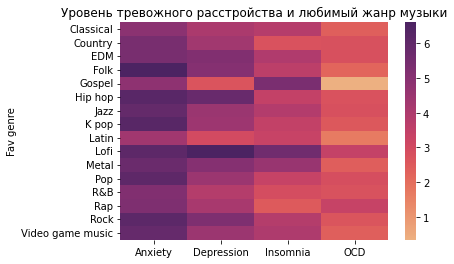

In [280]:
sns.heatmap(df_heatplot, cmap='flare')
plt.title('Уровень тревожного расстройства и любимый жанр музыки')

Явно выделяется, что те, кто любимт Gospel и Lofi стратают бессонницей. При этом В среднем все респонденты страдают тревожностью вне зависимости от того, какой у них любимый жанр. От депрессии меньше всего страдают те, кто слушают Gospel и Latin. А те, кто слушает Lofi, еще и от депрессии страдают. Можно выдвинуть гипотезу, что Lofi - жанр музыки для любителей посидеть ночью с депрессией.

### 6. Boxplot

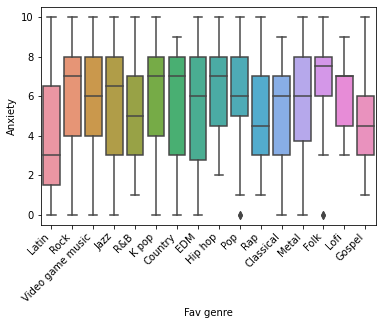

In [281]:
# посмотрим сначала уровень тревожности в зависимости от любимого жанра
sns.boxplot(x='Fav genre', y='Anxiety', data=df2)
plt.xticks(rotation=45, 
           ha='right');

In [283]:
# сделаем пару df, чтобы посмотреть, как влияет высокая частота прослушивания Gospel и Lofi на психологические расстройства
df_Gospel = df[df['Frequency [Gospel]'] == 3]
df_Lofi = df[df['Frequency [Lofi]'] == 3]

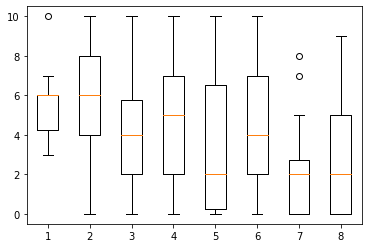

In [284]:
plt.boxplot([df_Gospel['Anxiety'], df_Lofi['Anxiety'], df_Gospel['Depression'], df_Lofi['Depression'], df_Gospel['Insomnia'], df_Lofi['Insomnia'], df_Gospel['OCD'], df_Lofi['OCD']])
plt.show()

Мы тут сравнивали между собой только зависимость расстройств от частого прослушивания Gospel и Lofi. Получается, что люди, у которых преобладают расстройства (любые), чаще слушают Lofe, при этом в Gospel высокие уровни тревожности или OCD встречаются гораздо реже - отдельные выбросы. Скорее всего эти типы музыки люди просто реже слушают